## <b> Ch 4. 금융시계열과 추가 변수를 이용한 시장 예측해 보기 </b>

### 변동성의 개념과 모형의 필요성
- 금융시계열에서 수익률의 분산을 보는 이유
  - t시점의 수익률 = 100 * ln(xt / xt-1)
- 시간가변하는 변동성을 모형화하는 경우, 분산이 시점 t에 의존하므로, t-1기까지의 정보를 이용하여 변동성을 측정하는 조건부 분산이 예측오차를 줄일 수 있다는 장점을 가진다
- 지금까지 다룬 시계열 분석은 **다른 변수** 또는 **해당 변수 자체의 과거값**의 변화에 대응하는 종속변수의 평균적인 변화 분석에 초점을 둠
  - 따라서 회귀모형 또는 시계열 모형에 포함되는 오차항에 대한 정보는 추정값에 대한 통계적 추론을 위하여 보조적 역할이었음
- 금융시장의 변동성은 시간에 따라 변화하는 것이 일반적 
  - 변동성이 커진다는 것은 일반적으로 자산시장으로 유입되는 정보의 양이 많아짐을 뜻함
  - 예) FOMC 금리 발표, 신흥국 환 위기, 유럽발 재정위기, 산유국 감산 소식 등
- 금융시장에서 변동성에 대한 관심이 증가함에 따라 금융시계열의 **분산**(variance) 및 **공분산**(covariance) 등에 대한 추정과 예측이 필요

- 변동성
  - 변동성은 자산 수익의 표준편차 혹은 분산으로 측정됨
- 대부분의 금융시계열은 변동성의 군집현상(volatility clustering)이 나타남
  - <b>오차항의 분산이 일정하다</b>는 OLS 회귀모형의 기본 가정을 <b>위배</b>
  - 기준금리를 비롯한 각종 경제지표의 발표, 금융위기, 재정 위기와 같은 외부 충격(shock)에 영향을 받는다는 의미
  - 이러한 충격이 일정기간 동안 영향을 미치게 되므로 시계열상 <b>이분산성</b>이 발생
- 조건부 분산
  - x 의 값을 알고 있을 때 이에 대한 조건부확률분포 p(y|x)의 분산
  - 예측문제의 관점으로 보면 조건부분산은 예측의 불확실성를 뜻함
- 조건부 이분산성 (Conditional Heteoskedasticity)
  - 오차항의 분산과 독립변수가 일정한 관계를 가질 수 있다 

### 변동성 모형: ARCH, GARCH 

<b>ARCH</b> (AutoRegressive Conditional Heteroskedasticity) - 자귀 회귀 조건부 이분산성
- ARCH 는 Engle(1982)에 의해 제시되었으며, 오차항의 분산의 현재값이 이전의 오차항의 제곱값들에 의존할 것이라는 접근에서 출발
- "바로 직전의 오차항의 제곱값에 의존": &sigma;t^2 = &alpha;0 + &alpha;1 * 
&varepsilon;t-1 ^2
- 전체 모형은 조건부 평균과 분산에 대해 두 개의 구별되는 모형을 포함함
- 평균값 뿐만 아니라 변동값도 고려해서 모델링

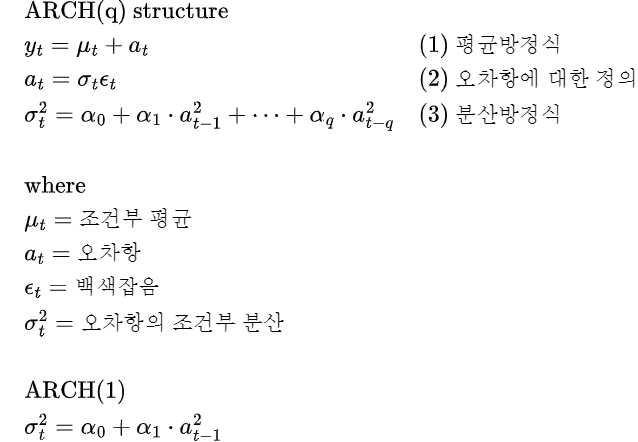

- ARCH 모형의 문제점
  - 양(+)의 shock과 음(-)의 shock을 동일하게 다루고 있음(과거 shock의 제곱값) 
  - : 실제로는 방향에 따라 비대칭적인 영향력을 보일 때가 많다 
  - ARCH 의 차수를 어떻게 결정해야 하는가?
  - : 실제로 필요한 q 값이 상당히 클 수가 있음
  - 조건부 분산이 양(+)이 되기 위한 충분조건은 파라미터가 모두 비음성(non-negative)이어야 함
  - : 추정해야하는 모수가 많아지는 경우 이러한 제약이 충족되지 않을 수 있음

<b>GARCH</b> (Generalized AutoRegressive Conditional Heteroskedasticity)
- ARCH 모형과 달리, GARCH 모형은 변동성의 시계열 의존성, 즉 자기상관을 표현하는 데 있어서 모수의 수를 줄일 수 있다는 장점
- GARCH 모형은 조건부분산이 직전의 오차항의 제곱값과 함께 자체 시차값(lagged values)에 의존하도록 함
- GARCH (1,1)
  - (1) Yt = &gamma;0 + &gamma;1* X1t + ... +  &gamma;k*Xkt + &varepsilon;t
  - (2) &sigma;t^2 = &omega; + &alpha;0 + &alpha;1 * 
&varepsilon;t-1 ^2 + ... + &alpha;q * &varepsilon;t-q ^2 
  - 조건부 평균에 대한 식 (1) 은 외생 변수 및 오차항의 함수로 표현됨

- GARCH(1, 1) = ARCH(∞) 모형이므로 추정해야 하는 모수의 수를 줄일 수 있다는 장점

### 벡터자기회귀(Vector AutoRegressive Model, VAR)

* VaR과 헷갈리지 말기

- 실증분석에서는 2개 이상의 시계열을 동시에 모형화하는 것이 유리
- 자산시장를 비롯한 거시경제 시계열은 서로 독립적으로 움직이는 것이 아니라 일정한 상관관계를 보이는 편
- 벡터자기회귀(VAR)은 k개의 AR식을 벡터로 쌓은 것과 같다 
- 다만 단일 시계열 AR과 다른 점은 설명변수로 자기 자신의 lag뿐 아니라 다른 변수들의 lag도 포함한다는 점

In [83]:
# Python `statsmodels` Datasets Package
# # https://www.statsmodels.org/0.6.1/datasets/index.html
# US Marcroecnomic Data
# # https://www.statsmodels.org/0.6.1/datasets/generated/macrodata.html

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [85]:
# Load data
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [86]:
# M1(협의의 통화량): 민간이 보유하고 있는 지폐, 동전 등 현금 유통성
# M2(광의의 통화량): 만기 2년 이내 -> 이자 포기시 현금화 가능
### 이자율 증가 --> M1 감소

# real GDP : 실질 국내 총생산 : 생산량(Q)에 기준년도(P)의 시장가격을 곱한 값--> 물가 상승률에 의한 가격변동이 제거되고 생산량 변동만을 반영--> 경제 성과 측정
# Nominal GDP :명목 국내 총생산 : 일정기간 동안 각 경제활동 부문이 만들어낸 부가가치가 전년도에 비해여 얼마나 증가하였는가 보는 지표 --> 전체적 규모ㅡ 구조적 변동 분석

# 범주 변수
# nominal scale : 온도:36, 기온 4 --> 숫자의 의미 없다, 명목적인 의미일 뿐
# 연속 변수

In [87]:
df = mdata.copy()

In [88]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
# quarterly

In [89]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

<Axes: >

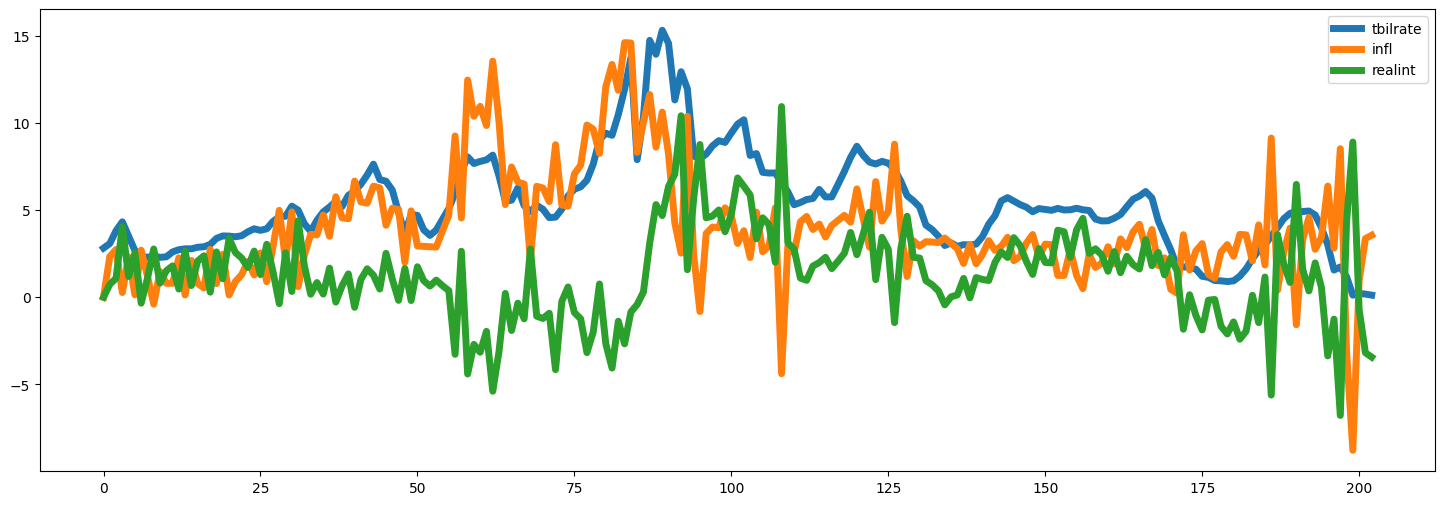

In [90]:
mdata[['tbilrate', 'infl',	'realint']].plot(figsize=(18, 6), linewidth=5)

In [91]:
mdata = mdata[['realgdp','realcons','realinv']] # select 3 series
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()


<Axes: >

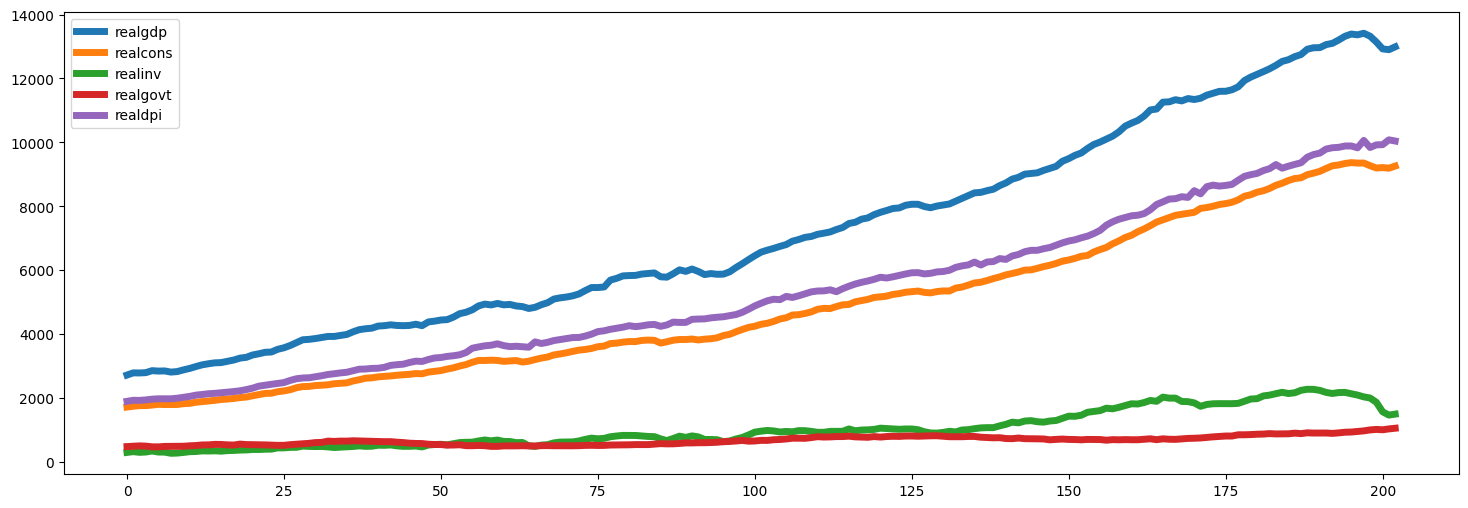

In [92]:
import matplotlib.pyplot as plt
df[['realgdp',	'realcons',	'realinv',	'realgovt',	'realdpi']].plot(figsize=(18, 6), linewidth=5)

In [93]:
# EDA


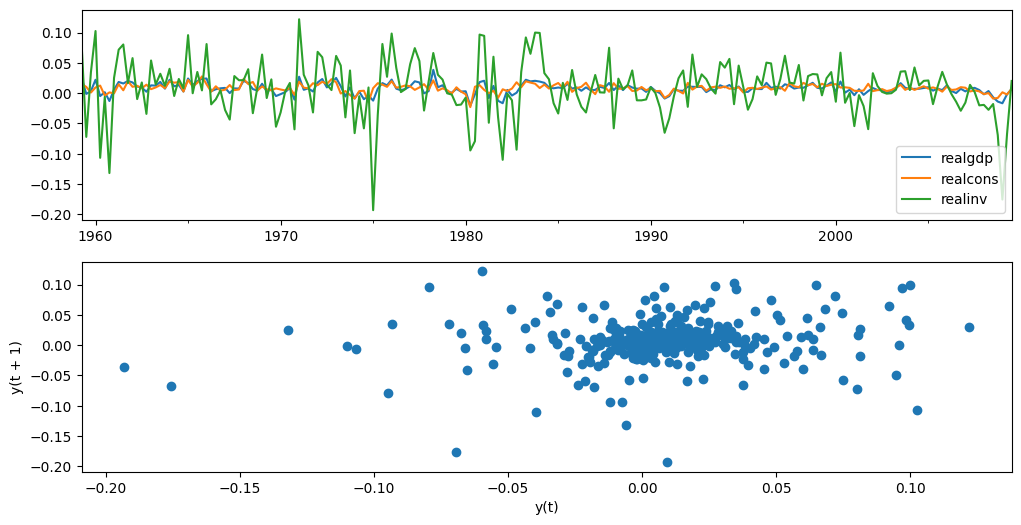

In [94]:
# Visualize serial correlations 
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
data.plot(ax=ax1) # series plot
pd.plotting.lag_plot(data) # lag plot # Random series does not exhibit a structure in the lag plot.
plt.show() 

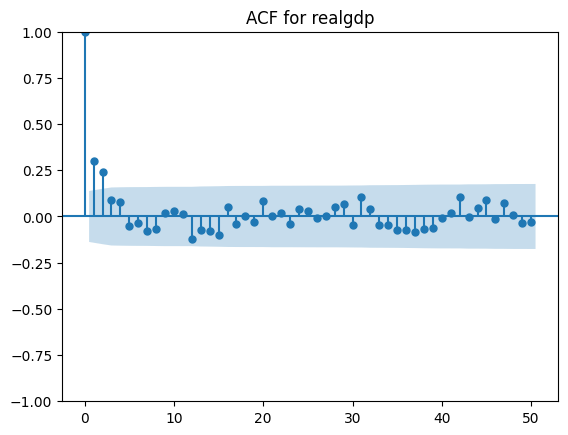

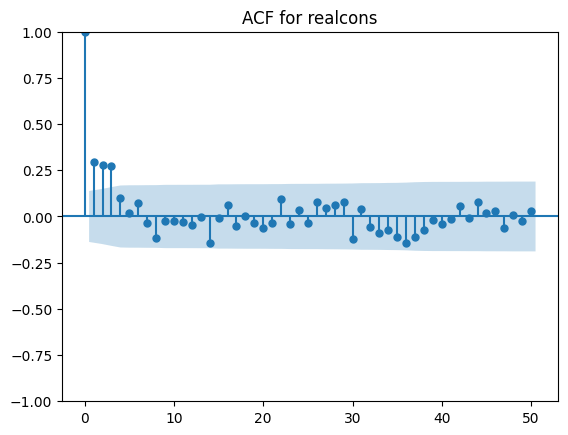

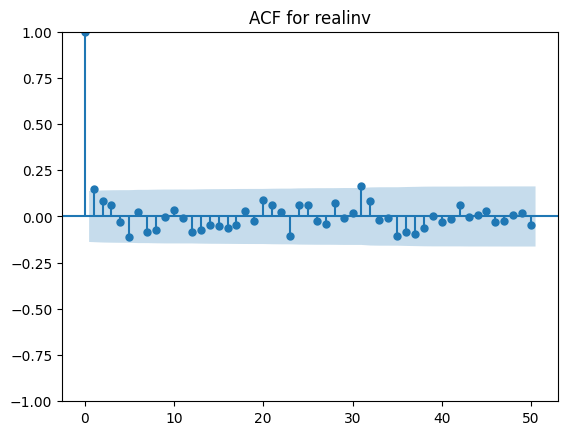

In [95]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
for i in data:
  plot_acf(data[i], lags=50)       ## 최대 시차 50
  plt.title('ACF for %s' % i)
  plt.show()

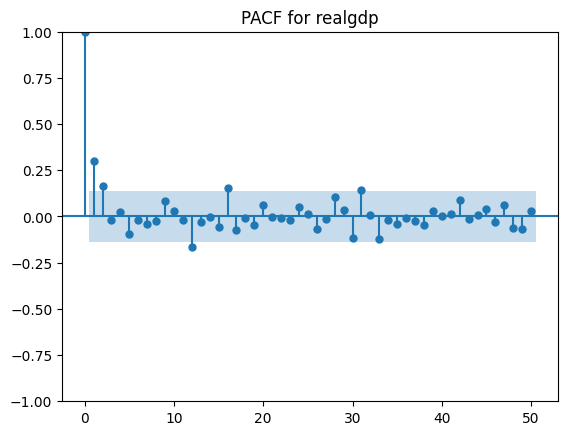

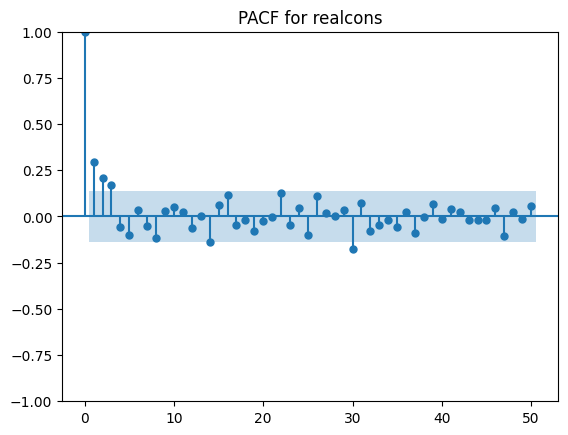

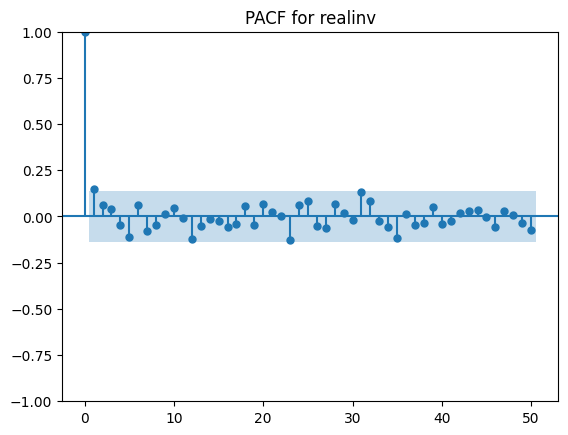

In [96]:
from statsmodels.graphics.tsaplots import plot_pacf
for i in data:
  plot_pacf(data[i], lags=50)
  plt.title('PACF for %s' % i)
  plt.show()

In [97]:
# Stationarity Check
# (H0): non-stationary
# (H1): stationary
## Augmented Dickey-Fuller(ADF) 검정을 수행하는 함수로, 시계열 데이터의 정상성을 평가하는 데 사용됩니다.
from statsmodels.tsa.stattools import adfuller
def adf(time_series):
  result = adfuller(time_series.values)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])

for i in data:
  print('--Test statistic for %s' % i)
  adf(data[i])
  


--Test statistic for realgdp
ADF Statistic: -6.972871
p-value: 0.000000
--Test statistic for realcons
ADF Statistic: -4.991971
p-value: 0.000023
--Test statistic for realinv
ADF Statistic: -12.218963
p-value: 0.000000


In [98]:
obs = 5
X_train, X_test = data[0:-obs], data[-obs:]

print(X_train.shape)
print(X_test.shape)

(197, 3)
(5, 3)


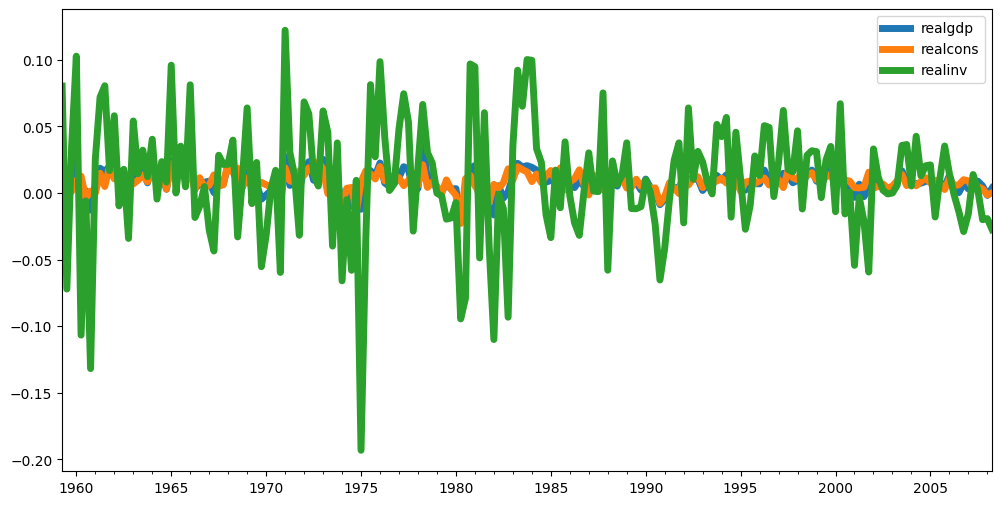

In [99]:
X_train.plot(figsize=(12, 6), linewidth=5)
plt.show()

In [100]:
## 차수결정
model_var = VAR(endog=X_train)             ## X_train을 endogenous 변수로 설정한 후
res = model_var.select_order(6)            ## select_order 메서드를 호출하여 최적의 차수를 선택, select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정
res.summary()                              ## , select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정

c:\Users\dgh06\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-27.82,-27.77,8.281e-13,-27.80
1,-28.10*,-27.89*,6.277e-13*,-28.01*
2,-28.07,-27.71,6.449e-13,-27.93
3,-28.07,-27.55,6.476e-13,-27.86
4,-28.07,-27.41,6.439e-13,-27.80
5,-28.05,-27.24,6.554e-13,-27.72
6,-28.01,-27.04,6.826e-13,-27.62


In [101]:
model_fit = model_var.fit(maxlags=3, ic='aic')         ## maxlags 매개변수를 통해 모델의 최대 시차(lag)를 설정하고, 
model_fit.summary()                                    ## ic 매개변수를 통해 정보 기준(criteria)을 선택합니다.

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 12, Jun, 2023
Time:                     22:48:56
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.8137
Nobs:                     196.000    HQIC:                  -27.9331
Log likelihood:           1923.07    FPE:                6.81589e-13
AIC:                     -28.0144    Det(Omega_mle):     6.41506e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.004187         0.000937            4.470           0.000
L1.realgdp         -0.357764         0.174314           -2.052           0.040
L1.realcons         0.711044         0.133371            5.331    

In [102]:
X_test.shape

(5, 3)

In [103]:
lag_order = model_fit.k_ar     ## k_ar은 VAR 모델에서 사용된 자기회귀 차수(auto-regressive order)를 나타냅니다
print(lag_order)               ## 은 모델에서 사용된 최대 시차(lag)를 나타냅니다.

1


In [104]:
model_fit.forecast(X_train.values[-lag_order:], steps=5)
##  forecast 메서드를 사용하여 마지막 lag_order 개의 데이터를 기반으로 5개의 시점에 대한 예측을 수행하고, 예측 결과를 출력합니다

array([[ 0.00140148,  0.00531336, -0.02966532],
       [ 0.00573479,  0.00691368, -0.00123542],
       [ 0.00697939,  0.00794494,  0.00403378],
       [ 0.0075745 ,  0.0082942 ,  0.00725638],
       [ 0.00779776,  0.0084469 ,  0.00835919]])

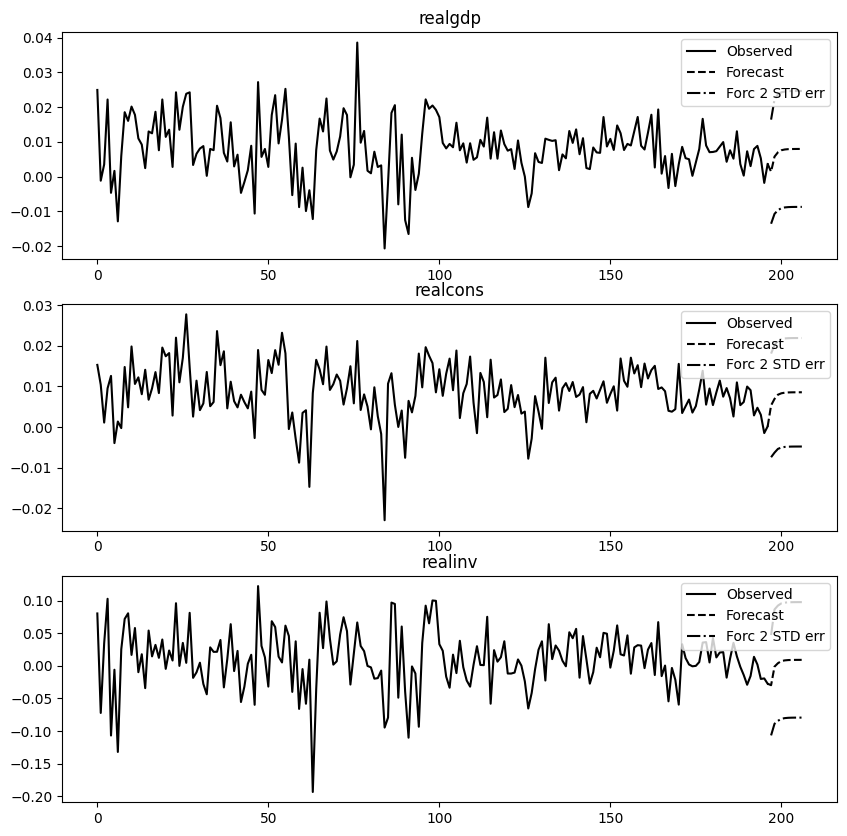

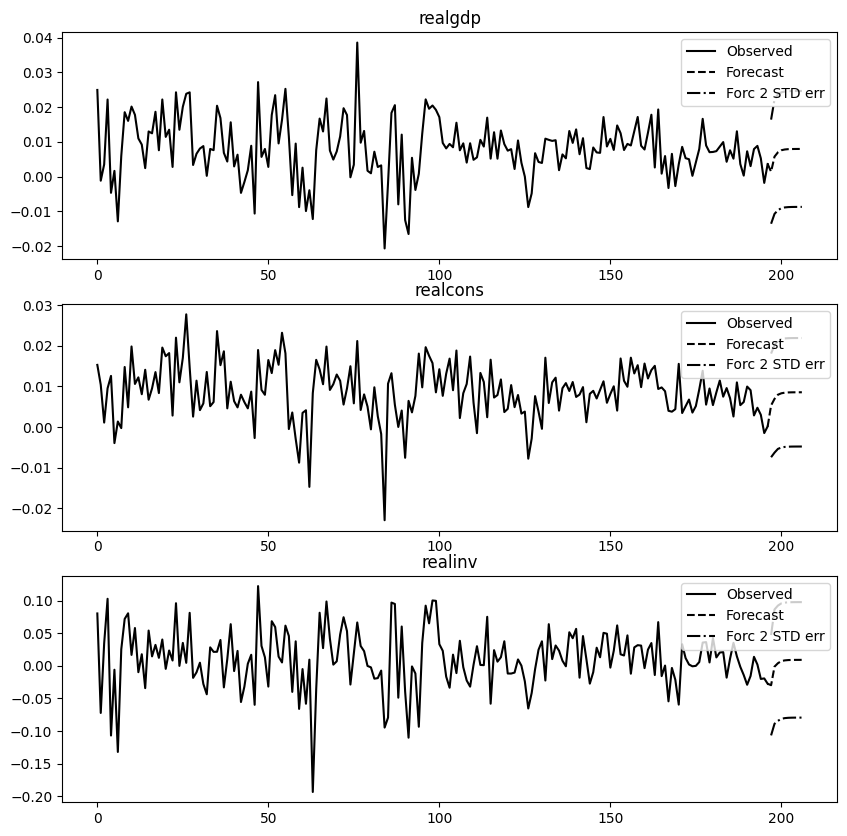

In [105]:
model_fit.plot_forecast(10)

In [106]:
X_train.tail()

,realgdp,realcons,realinv
2007-06-30,0.007913,0.002845,0.013787
2007-09-30,0.008832,0.004735,0.001976
2007-12-31,0.005252,0.002995,-0.020078
2008-03-31,-0.001823,-0.001496,-0.019276
2008-06-30,0.003614,0.000150,-0.027435


In [107]:
X_train.values[-lag_order:]

array([[ 0.00361443,  0.00014973, -0.02743538]])

In [108]:
obs

5

In [109]:
pred = model_fit.forecast(X_train.values[-lag_order:], steps=obs)
pred = pd.DataFrame(pred, index=X_test.index, columns=X_test.columns + '_pred')
pred

,realgdp_pred,realcons_pred,realinv_pred
2008-09-30,0.001401,0.005313,-0.029665
2008-12-31,0.005735,0.006914,-0.001235
2009-03-31,0.006979,0.007945,0.004034
2009-06-30,0.007575,0.008294,0.007256
2009-09-30,0.007798,0.008447,0.008359


In [110]:
# VAR Forecast evaluation

In [111]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [112]:
#Calculate forecast bias
forecast_errors = [X_test['realgdp'][i]- pred['realgdp_pred'][i] for i in range(len(X_test['realgdp']))]
bias = sum(forecast_errors) * 1.0/len(X_test['realgdp'])
print('Bias: %f' % bias)

#Calculate mean absolute error
mae = mean_absolute_error(X_test['realgdp'],pred['realgdp_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(X_test['realgdp'], pred['realgdp_pred'])
print('MSE: %f' % mse)
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -0.012335
MAE: 0.012335
MSE: 0.000219
RMSE: 0.014799


### 벡터오차수정모형(Vector Autocorection Model, VECM)

- 공적분 관계의 존재 여부에 따라 VAR와 VECM을 선택
- 공적분(Cointegration): 두 비정상 시계열을 선형조합 했을 때 시계열의 적분 차수가 낮아지거나 정상상태가 되는 경우
   - 공적분이 있는지 확인해야됨
   * 적분차수: 정상성이 되기까지 차분해야 하는 횟수
- 두 개 이상의 시계열이 공적분 관계에 있으면 장기관계 또는 균형관계를 가진다는 의미
  - VAR 모형은 각 시계열이 안정성 조건을 만족하지 않아도 사용할 수 있지만, 일반적으로 불안정성 시계열의 경우 차분을 하거나 변수간 장기적 관계에 대하여 정보를 상실할 수 있다는 단점
  - 따라서 변수간 공적분 관계에 있는 시계열은 차분을 거치지 않고 원 데이터를 써서 모형에 적합시킬 수 있다는 점에서 장점을 가진다
  - "Spurious Correlation" (가짜 상관관계)

In [113]:
# VECM Estimation and Analysis

In [114]:
from statsmodels.tsa.vector_ar import vecm

In [115]:
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다

In [116]:
vec_rank = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'trace', signif=0.01)
print(vec_rank.summary())

## select_coint_rank 메서드를 사용하여 공적분 순위를 선택할 수 있습니다. 
## det_order는 결정론적(deterministic) 요소의 차수,
## k_ar_diff는 자기회귀 차분(auto-regressive differencing)의 차수,
## method는 공적분 순위 선택에 사용되는 방법, signif는 유의수준을 의미합니다.

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   3          221.1          41.08
  1   3          109.7          23.15
  2   3          39.12          6.635
-------------------------------------


In [117]:
vec_rank2 = vecm.select_coint_rank(X_train, det_order = 1, k_ar_diff = 1, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          111.4          29.26
  1   2          70.58          21.75
  2   3          39.12          6.635
-------------------------------------


In [118]:
vecm = vecm.VECM(endog = X_train, k_ar_diff = 9, coint_rank = 3, deterministic = 'ci')
vecm_fit = vecm.fit()
vecm_fit.predict(steps=10)
## Vecm은 VECM 모델을 구축하기 위한 클래스 또는 함수를 나타냅니다. 
## endog은 종속 변수로 사용할 학습 데이터를 지정합니다. k_ar_diff는 자기회귀 차분(auto-regressive differencing)의 차수를 설정하고
## coint_rank는 공적분(cointegration) 순위를 설정합니다. deterministic은 결정론적(deterministic) 요소의 유형을 선택합니다.

c:\Users\dgh06\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


array([[ 0.00082687,  0.00010849, -0.00520949],
       [-0.00249132, -0.00304268, -0.02092717],
       [-0.00242262, -0.00120947, -0.03049337],
       [-0.00187847,  0.00074454, -0.02943497],
       [-0.00018527,  0.00233478, -0.02139283],
       [ 0.00200132,  0.00645151, -0.01665064],
       [ 0.00712903,  0.00793533,  0.01693045],
       [ 0.00686419,  0.00854292,  0.01681462],
       [ 0.01011226,  0.01106216,  0.02519952],
       [ 0.01133034,  0.01202314,  0.03487855]])

In [119]:
forecast, lower, upper = vecm_fit.predict(10, 0.05)
print('Lower Bounds of Confidence Intervals:')
print(lower.round(3))
print('\nPoint Forecasts:')
print(forecast.round(3))
print('\nUpper Bounds of Confidence Intervals:')
print(upper.round(3))

Lower Bounds of Confidence Intervals:
[[-0.012 -0.011 -0.068]
 [-0.016 -0.014 -0.089]
 [-0.017 -0.013 -0.1  ]
 [-0.016 -0.011 -0.099]
 [-0.015 -0.01  -0.094]
 [-0.013 -0.006 -0.091]
 [-0.008 -0.005 -0.059]
 [-0.009 -0.004 -0.06 ]
 [-0.006 -0.002 -0.054]
 [-0.005 -0.001 -0.046]]

Point Forecasts:
[[ 0.001  0.    -0.005]
 [-0.002 -0.003 -0.021]
 [-0.002 -0.001 -0.03 ]
 [-0.002  0.001 -0.029]
 [-0.     0.002 -0.021]
 [ 0.002  0.006 -0.017]
 [ 0.007  0.008  0.017]
 [ 0.007  0.009  0.017]
 [ 0.01   0.011  0.025]
 [ 0.011  0.012  0.035]]

Upper Bounds of Confidence Intervals:
[[0.014 0.011 0.057]
 [0.011 0.008 0.047]
 [0.012 0.01  0.039]
 [0.013 0.013 0.04 ]
 [0.015 0.015 0.051]
 [0.017 0.019 0.058]
 [0.023 0.021 0.092]
 [0.023 0.021 0.094]
 [0.026 0.024 0.105]
 [0.027 0.025 0.116]]


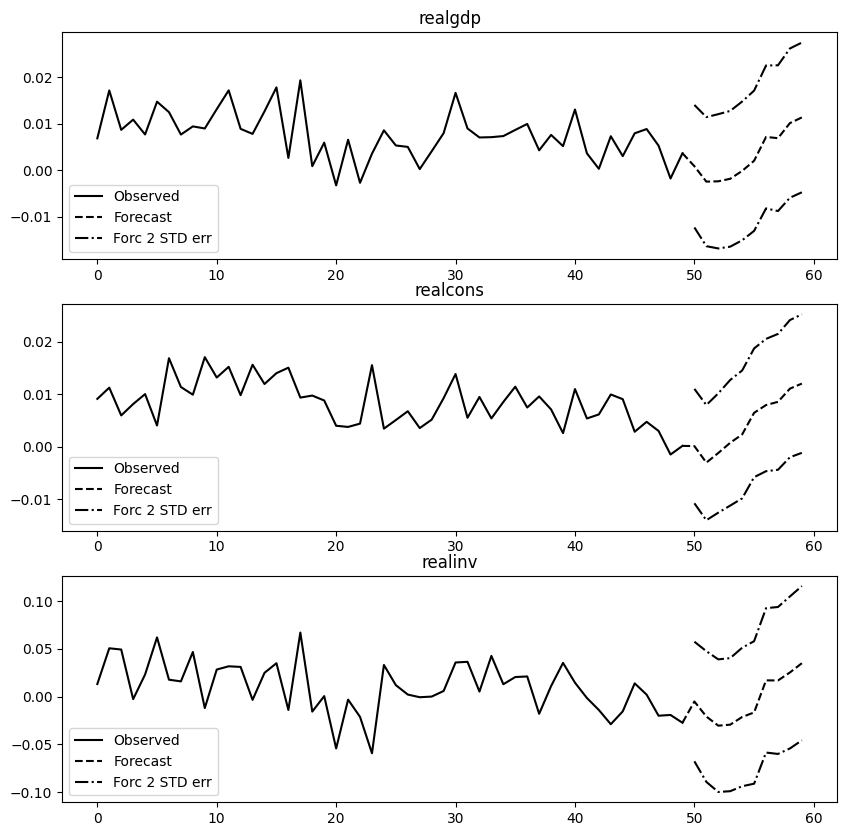

In [120]:
vecm_fit.plot_forecast(steps=10, n_last_obs=50)

In [121]:
# Lag order selection

In [141]:
results = model.fit()

In [142]:
model.select_order().summary() # default: 15

AttributeError: 'VECM' object has no attribute 'select_order'

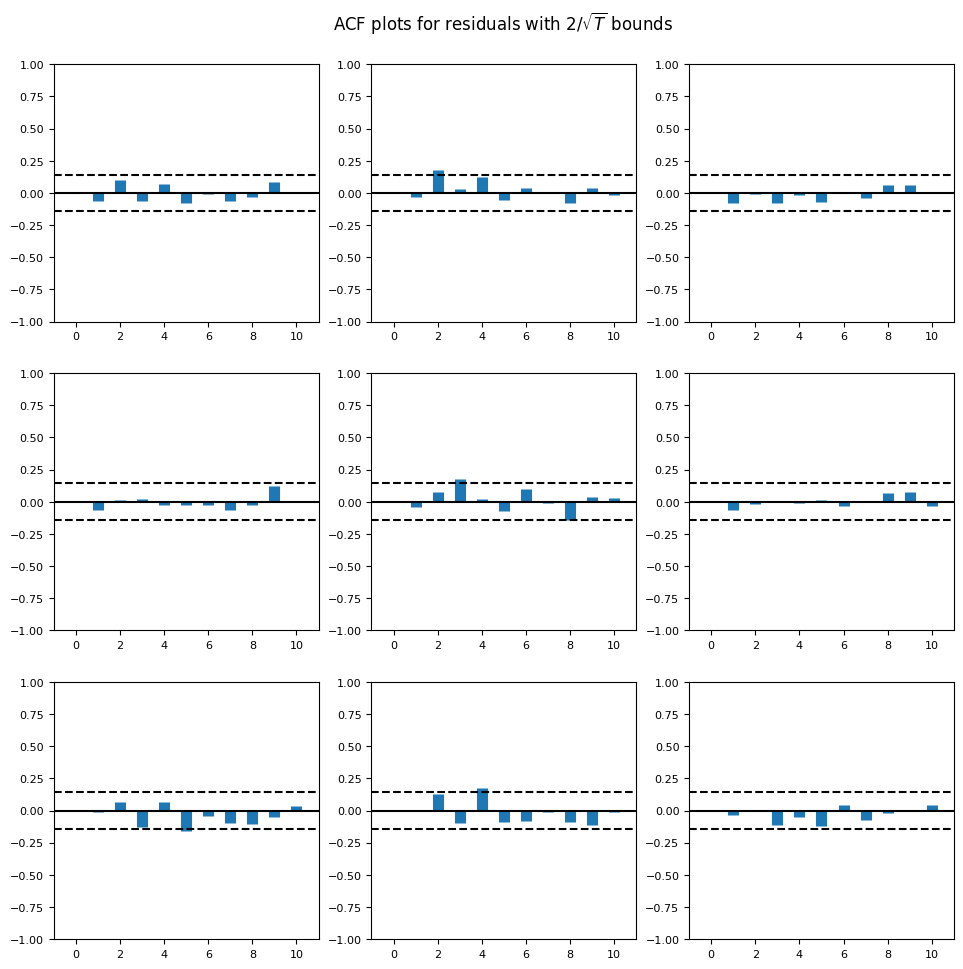

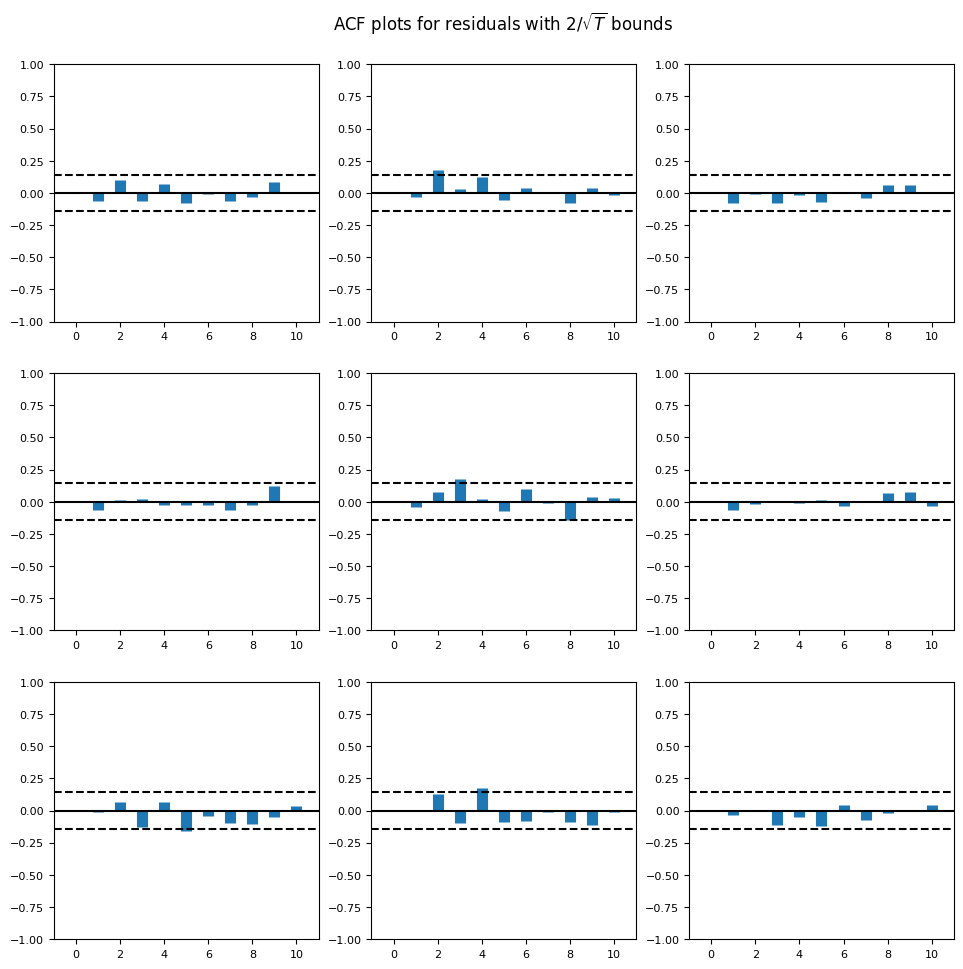

In [140]:
results.plot_acorr()

In [143]:
# Forecasting

In [144]:
lag_order = results.k_ar ## 위의 결과는?
results.forecast(data.values[-lag_order:], 5)

AttributeError: 'VECMResults' object has no attribute 'forecast'

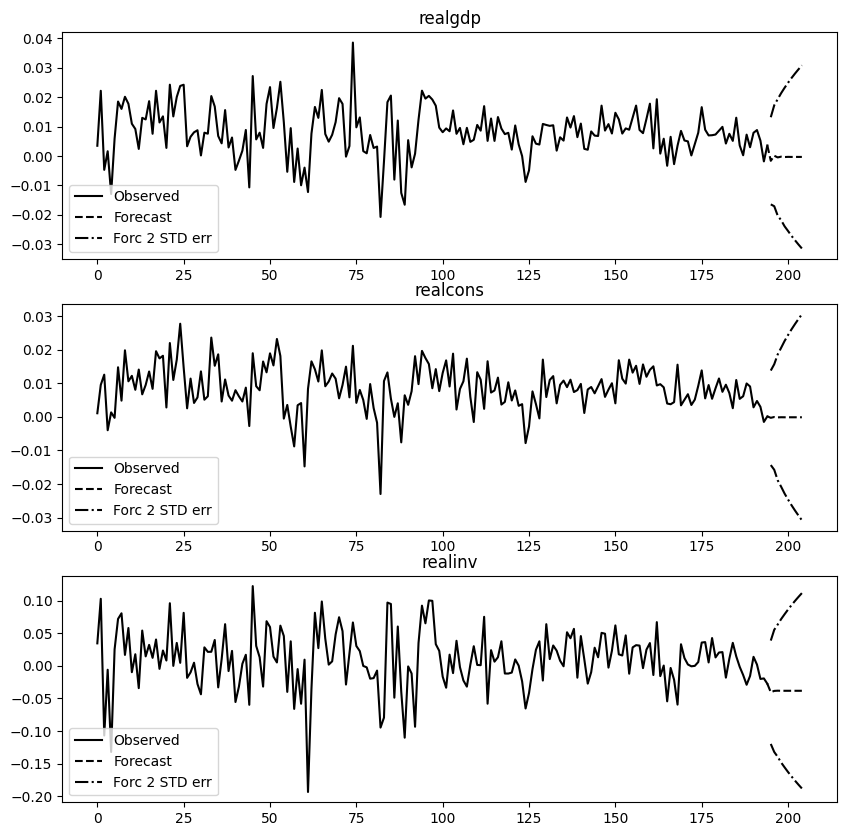

In [145]:
results.plot_forecast(10)

<b> 충격반응함수 </b>(Impulse Response Function, IRF)
- 충격반응함수는 VAR의 추정계수를 바탕으로 모형 내 변수에 대하여 일정한 크기의 충격을 가할 때 모형의 모든 변수들이 시간의 흐름에 따라 어떻게 반응하는가를 나타낸 것
- 내생변수의 현재값과 미래값에 대한 오차항 중 하나에 대한 1표준편차 충격(one standard deviation shock)의 효과를 추적함
- 즉, 특정 변수의 단위당 충격(unit shock)의 크기에 해당하는 충격을 그것이 자기 자신의 변수와 나머지 변수에 미치는 영향을 의미
- 변수간의 상호인과관계를 분석하고 변수의 변화에 따른 파급효과를 분석하는 데 이용

In [146]:
irf = results.irf(10)

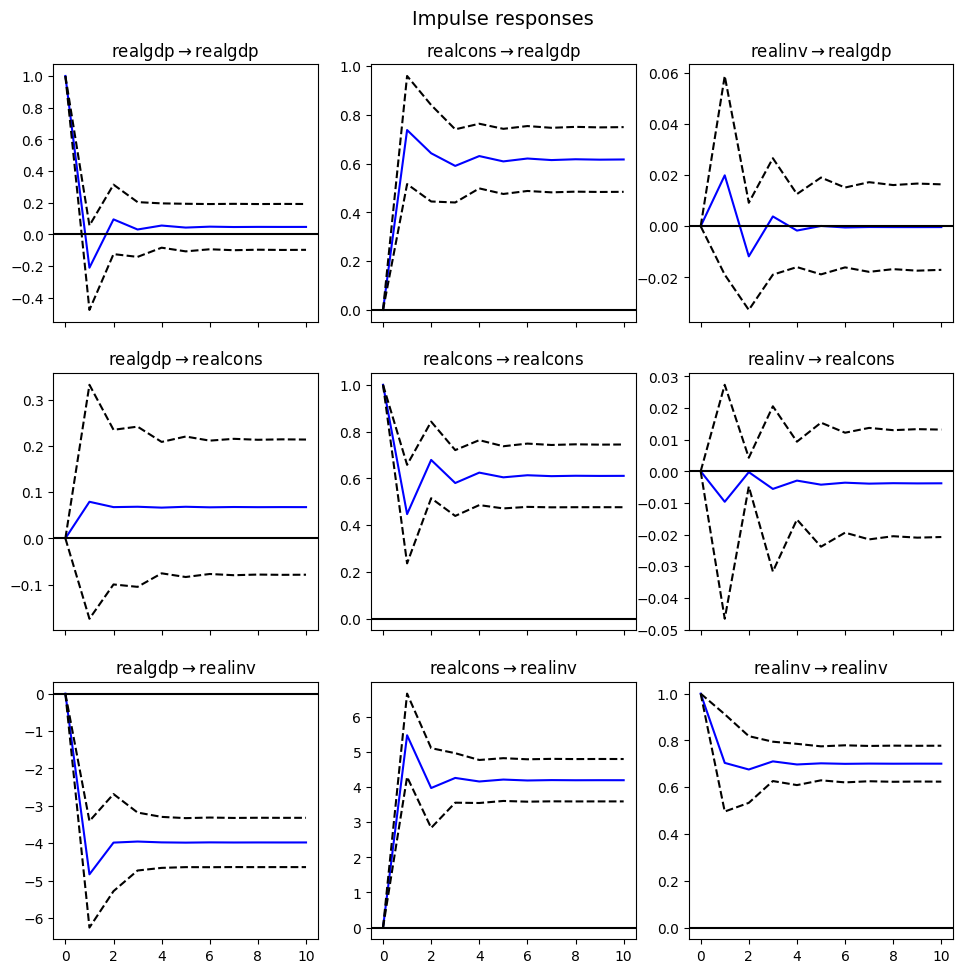

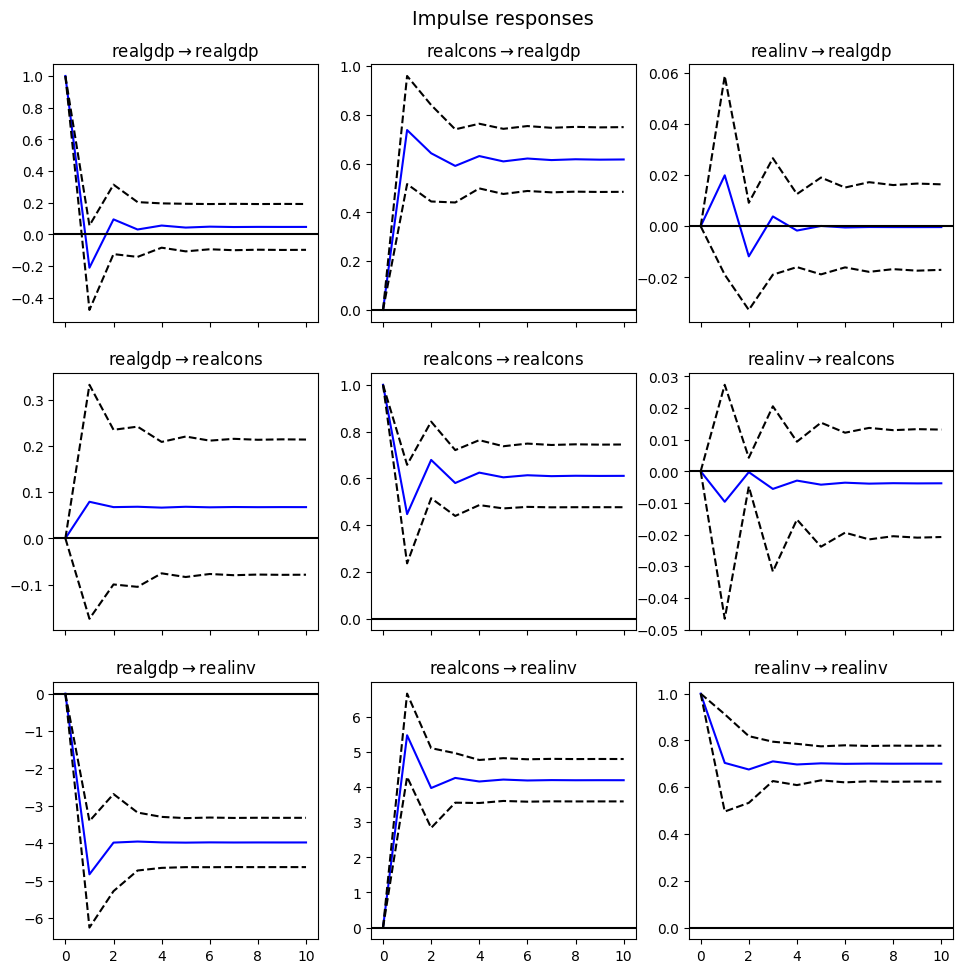

In [147]:
irf.plot(orth=False)

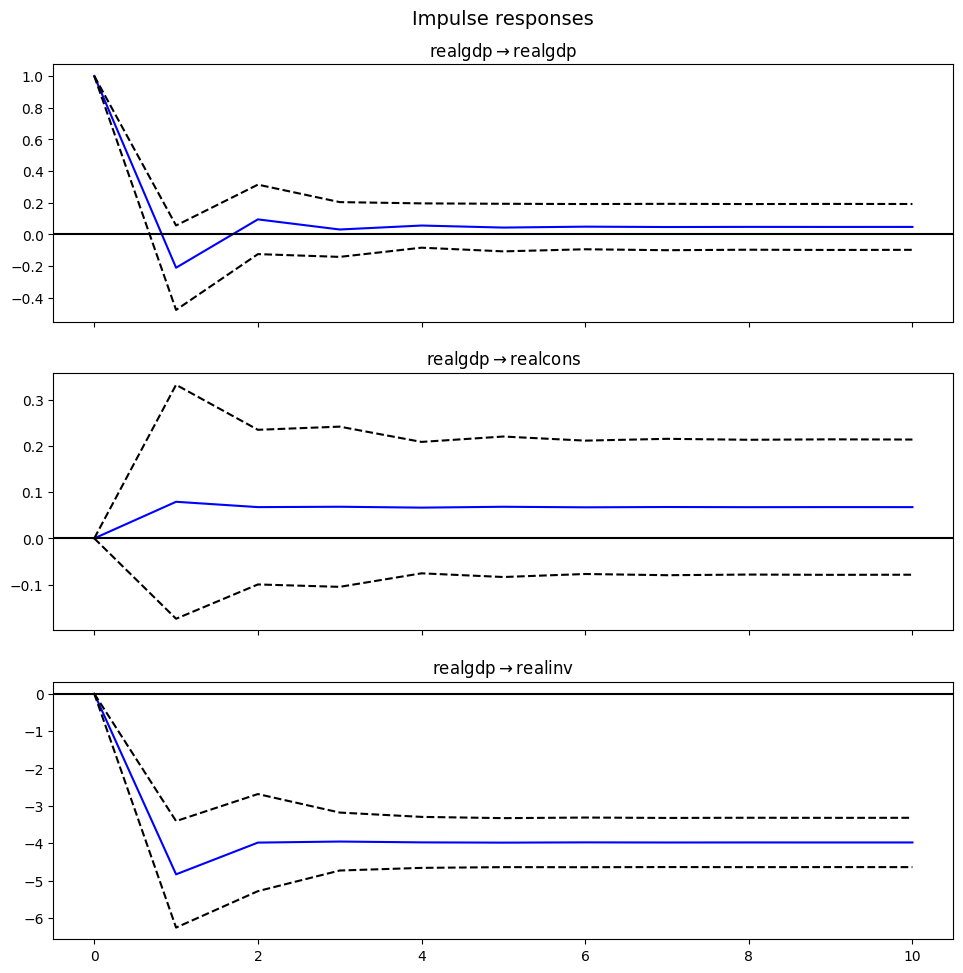

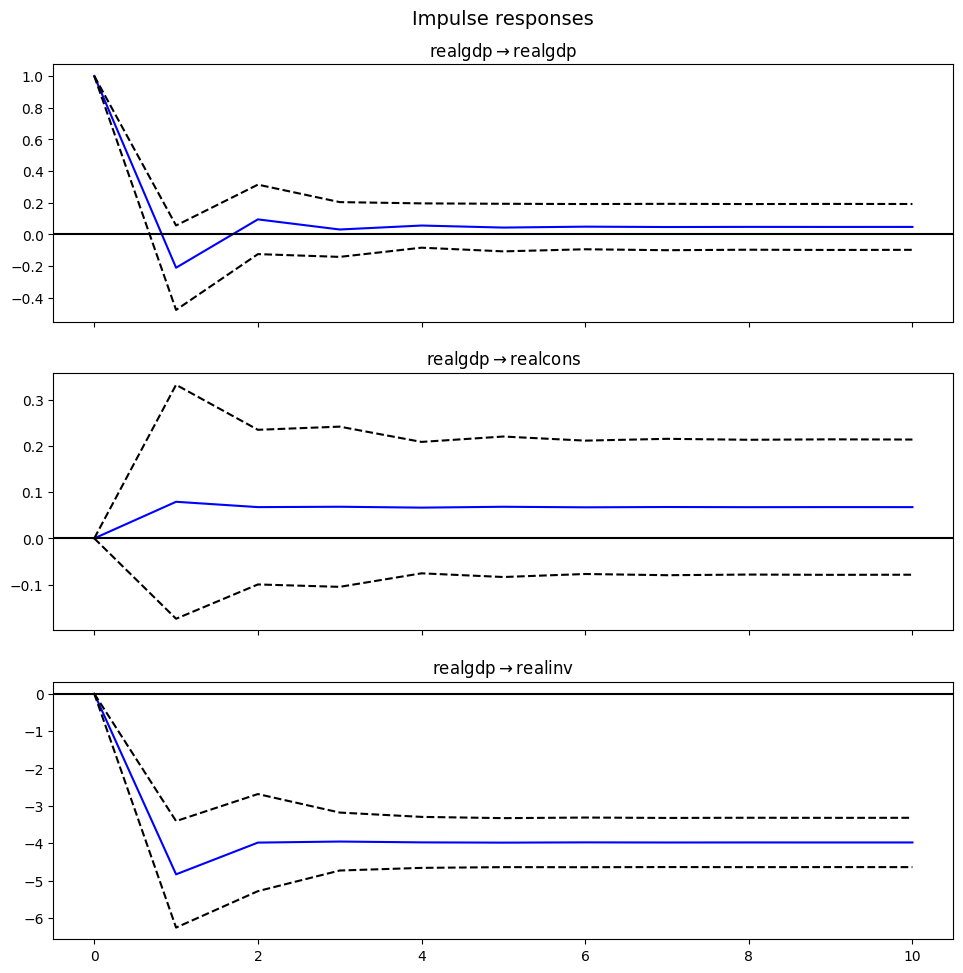

In [148]:
irf.plot(impulse='realgdp')

In [149]:
irf.plot_cum_effects(orth=False)

AttributeError: 'IRAnalysis' object has no attribute 'lr_effects'